In [32]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# reading in all the words
words = open('names.txt', 'r').read().splitlines()
print(words[:8])
type(words) # splitlines returns a list

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']


list

In [34]:
len(words)

32033

In [35]:
# building the vocanulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s : i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [88]:
# building the dataset

block_size = 3 # context lenght: how many characters do we take to predict the next one(building character level four-gram model)
X, Y = [], []
for w in words:
    
    #print(w)
    context = [0] * block_size # gives [0, 0, 0] as block_size=3
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '----->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [89]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [38]:
C = torch.randn((27, 2)) # grabbing all characters in 2d space

In [39]:
# in the previous model made one_hot vectors opf dim (1, 27) for each alphabet being fed to the model to get the next alpha
# here only 2d vector already made using torch.randn function
C[5] # 5th alphabet's vector, # This is what will be fed to the model

tensor([ 0.0332, -0.1855])

In [40]:
# if one_hot encoded And * C ---> gives the same result
F.one_hot(torch.tensor(5), num_classes = 27).float() @ C # dot product of [0,0,0,0,1,0,0...0] @ C(27,2) will give C[5] only 

tensor([ 0.0332, -0.1855])

In [41]:
# how to ask for all the character embeddings?

# can poss a list
print(C[[5, 6, 7]])

# tensor of list
print(C[torch.tensor([5, 6, 7, 7, 7])])

# can give multidim vector as well
C[X].shape

tensor([[ 0.0332, -0.1855],
        [ 2.2083,  0.1452],
        [-0.0978, -0.2302]])
tensor([[ 0.0332, -0.1855],
        [ 2.2083,  0.1452],
        [-0.0978, -0.2302],
        [-0.0978, -0.2302],
        [-0.0978, -0.2302]])


torch.Size([32, 3, 2])

In [42]:
# X[13,2]

In [43]:
# C[X][13,2], C[1] # both equal

In [44]:
# C[X].shape # passed (32,3) to C(27,2) to find their embedding

In [45]:
# creating embedding of our input
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [46]:
W1 = torch.randn((6, 100)) # 6 as 2dim embedding of each alpha and have 3 of them, 100 neurons in the first hidden layer or the second layer if we consider embedding layer as the first which creates embedding of the alphabets
b1 = torch.randn(100) # need 100 biases

In [16]:
emb @ W1 + b1 # dot product won't happen

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [47]:
# concatenation needs to be done
emb[:, 0, :].shape # it gives the 1st alphabet embedding in all the X ie 1st alphabet in all the triplets that we are feeding to the model

torch.Size([32, 2])

In [48]:
# so:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape # concatenate along dim 1

torch.Size([32, 6])

In [49]:
A = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
torch.unbind(A,1)

(tensor([1, 4, 7]), tensor([2, 5, 8]), tensor([3, 6, 9]))

In [50]:
# pytorch funtion that does the same thing as the above Cat code
# also helps as code would remain same if block_size is changed
torch.cat(torch.unbind(emb, 1), 1).shape # unbinds along the dimension from th original matrix.(32,3,2) will...

torch.Size([32, 6])

In [51]:
# the best way to do this concatenation is 
emb.view(32, 6) # also cat allocates whole new memory

tensor([[ 0.8379, -1.3315,  0.8379, -1.3315,  0.8379, -1.3315],
        [ 0.8379, -1.3315,  0.8379, -1.3315,  0.0332, -0.1855],
        [ 0.8379, -1.3315,  0.0332, -0.1855,  1.3219,  0.0708],
        [ 0.0332, -0.1855,  1.3219,  0.0708,  1.3219,  0.0708],
        [ 1.3219,  0.0708,  1.3219,  0.0708, -1.5217, -1.3803],
        [ 0.8379, -1.3315,  0.8379, -1.3315,  0.8379, -1.3315],
        [ 0.8379, -1.3315,  0.8379, -1.3315, -1.2489,  0.5632],
        [ 0.8379, -1.3315, -1.2489,  0.5632, -0.6765,  1.0918],
        [-1.2489,  0.5632, -0.6765,  1.0918, -1.8088,  0.8582],
        [-0.6765,  1.0918, -1.8088,  0.8582, -0.4232,  0.2408],
        [-1.8088,  0.8582, -0.4232,  0.2408, -1.8088,  0.8582],
        [-0.4232,  0.2408, -1.8088,  0.8582, -1.5217, -1.3803],
        [ 0.8379, -1.3315,  0.8379, -1.3315,  0.8379, -1.3315],
        [ 0.8379, -1.3315,  0.8379, -1.3315, -1.5217, -1.3803],
        [ 0.8379, -1.3315, -1.5217, -1.3803, -0.4232,  0.2408],
        [-1.5217, -1.3803, -0.4232,  0.2

In [52]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [53]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) #  -1(will derive the shape itself) or emb.shape[0](will give 32), helps to generalize for different batch-sizes
h

tensor([[-0.6245, -0.8677, -0.4374,  ...,  0.8716, -0.9997, -1.0000],
        [-0.9892, -0.0535,  0.2852,  ...,  0.8536, -0.9997, -0.9785],
        [ 0.8342, -0.9852, -0.8877,  ...,  0.7856, -0.9987, -0.7661],
        ...,
        [ 0.9966,  0.7675,  0.8316,  ..., -0.8744, -0.2493, -1.0000],
        [-1.0000,  0.9997,  0.9975,  ..., -0.8977, -0.8054,  0.9946],
        [ 0.9972, -0.3696,  0.7428,  ..., -0.9957, -0.0036, -1.0000]])

In [54]:
h.shape

torch.Size([32, 100])

In [55]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [56]:
logits = h @ W2 + b2

In [57]:
logits.shape

torch.Size([32, 27])

In [58]:
counts = logits.exp()

In [59]:
prob = counts / counts.sum(1, keepdims = True)

In [60]:
prob.shape

torch.Size([32, 27])

In [61]:
prob[0].sum()

tensor(1.0000)

In [62]:
# need to get the prob of the correct Ys as assigned by the model
prob[torch.arange(32), Y] # will basically take as (0,5), (1, 13), (2, 13), (3, 1)....(31, 0)

tensor([5.9573e-04, 1.3318e-04, 1.6247e-07, 4.5882e-02, 1.8418e-15, 6.3744e-10,
        2.2312e-11, 2.2356e-08, 2.7559e-08, 1.2859e-05, 4.6639e-12, 6.9944e-02,
        5.7369e-01, 1.9839e-11, 2.4537e-07, 1.4028e-04, 4.3274e-05, 1.7038e-06,
        2.6631e-06, 5.4828e-05, 1.3502e-03, 1.7034e-04, 7.1755e-11, 6.7335e-09,
        1.7440e-04, 1.7005e-05, 5.5612e-09, 5.7658e-09, 4.6060e-06, 1.3403e-02,
        2.2551e-08, 1.9230e-01])

In [63]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [64]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(13.6227)

In [65]:
# these are the probabilities that need to be maximized, therefore log prob should also be maximized and -log_prob should be minimized
# hence the loss function, also called the cross entropy loss function.
F.cross_entropy(logits, Y) # same as above, need to pass in the logits or counts and true labels

tensor(13.6227)

In [66]:
# -------------------------- PUTTING ALL TOGETHER ------------------------------ #

In [ ]:
# training model on the whole data right now, could memorize the whole training set, and would give higher loss on unseen data
# so 3 sets

# training, validation, test
# 80, 10, 10%
# training - used for tuning the parameters
# dev / validation - used for tuning hyperparameters ie neurons in 2nd layer, embedding size, regularization
# testing - for testing the model

In [155]:
# making the 3 sets

def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182512, 3]) torch.Size([182512])
torch.Size([22860, 3]) torch.Size([22860])
torch.Size([22774, 3]) torch.Size([22774])


In [177]:
Xtr.shape, Ytr.shape

(torch.Size([182512, 3]), torch.Size([182512]))

In [211]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator = g) # might be placing a lot of characters in 2d space, hence increasing to 10
W1 = torch.randn((30, 200), generator = g) #3 2 dimensional vectors being fed as i/p
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [212]:
sum(p.nelement() for p in parameters)

11897

In [213]:
for p in parameters:
    p.requires_grad = True

In [170]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [214]:
lri = []
lossi = []
stepi = []

In [218]:
for i in range(50000):
    
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,)) # it's better to have an approximate gradient and make more steps then it is to evaluate the exact gradient and take lesser steps
    
    # forward pass
    emb = C[Xtr[ix]] #(32, 3, 2) , got 3 alphabets in ix
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) #(32, 100) # emb.view(-1, 6) to view(-1, 30)
    logits = h @ W2 + b2 #(32, 27)
    loss = F.cross_entropy(logits, Ytr[ix]) # y[ix] got the aplha after the three alphabets in X[ix]
#     print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
        
    # update
#     lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
        
    #track stats
    #lri.append(lr)
    stepi.append(i)
    lossi.append(loss.log10().item())
        
#print(loss.item()) # on a mini batch

# took the whole words list and running again

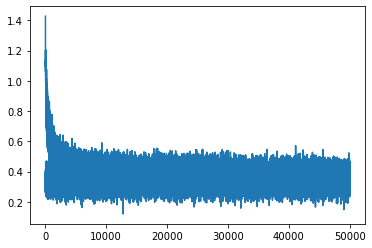

In [219]:
plt.plot(stepi, lossi)

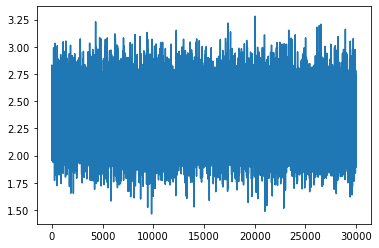

In [192]:
plt.plot(stepi, lossi)

In [175]:
# print(loss.item())

2.4396114349365234


In [221]:
# loss on training set
emb = C[Xtr] 
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1895, grad_fn=<NllLossBackward0>)

In [220]:
# above is loss of a mini batch
# this is ths loss on the whole dataset
# evaluating using dev set here, so weights are already updated through previous block of code.
# losses almost equal hence not underfitting, scaling the model.(if scaling might take longer to converge)

emb = C[Xdev] 
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss
# running above code 5 times ie 5 times backpropagation got loss of 2.37, could decay loss as well to see how loss is changing.

tensor(2.2136, grad_fn=<NllLossBackward0>)

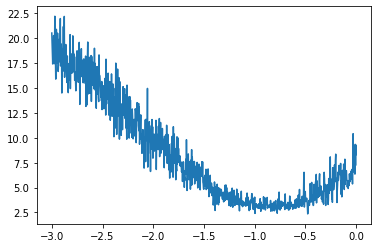

In [133]:
plt.plot(lre, lossi)

In [196]:
C.shape # embedding matrix

torch.Size([27, 2])

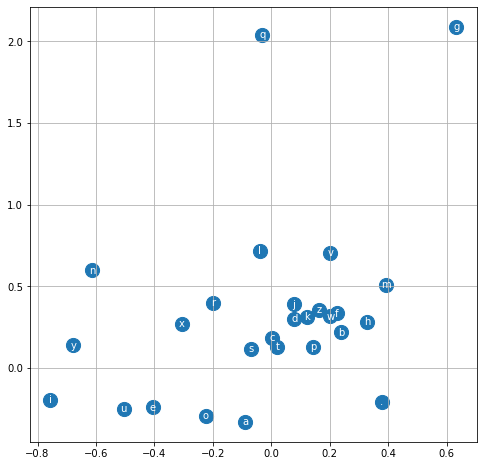

In [194]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center",va="center", color="white") #(pos_x, pos_y, character)
plt.grid('minor')

# learned and clusterred somewhat

##### using the above plot(b/w loss and learning rate) we can figure which learning rate would be best for our model.

In [101]:
# # constructing mini batches by randomly taking samples of 32
# ix = torch.randint(0, 10, (5,)) # gives 5 random int b/w [0, 10) , how many needs to be passed as tuple
# ix

tensor([3, 6, 0, 4, 1])

In [106]:
# X.shape[0]

228146

In [107]:
# ix = torch.randint(0, X.shape[0], (32,))
# ix

tensor([115464, 136939, 222236, 134963,  87700, 215414,  70013,  65531,  68325,
        206280, 133457, 151571, 208605, 106661,   2206, 159665, 134433, 158292,
         87647, 198770, 150025,  27719,  27123, 184141, 119550,  46932, 110756,
        227619,  33863, 207992, 177515, 116036])

In [156]:
# len(words)

32033

In [223]:
# samnple from the model

g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    
    out = []
    context = [0] * block_size # contains index of each alpha initially '...'
    while True:
        emb = C[torch.tensor([context])] #(1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples = 1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
        
    print(''.join(itos[i] for i in out))

junide.
canasah.
parlay.
adin.
kailello.
cassathe.
kalania.
zamilena.
jadedailewi.
tayse.
sinayla.
terinveumarif.
demmer.
finsleigh.
ann.
core.
yae.
ocklynna.
din.
jamiia.
